# Datasets

In [ ]:
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import random

np.random.seed(1234)

In [ ]:
def distribution_dispersion(Xs):
  outs = []
  for (X1,X2) in itertools.combinations(Xs,2):
    X = X1-X2
    X = X.ravel()
    X = X/np.linalg.norm(X,2)
    outs.append(abs(X).max())
  return outs

def plot_dispersion(Xs,ax=None,label=None):
  outs = distribution_dispersion(Xs)
  sns.kdeplot(outs, bw=0.25, ax = ax, label=label)

datasets = {}

## CIFAR10

In [ ]:
from tensorflow.keras.datasets import cifar10

n_samples = 250
Xs = []
(train_data,_),_ = cifar10.load_data()
#subsample = np.random.random_integers(0,len(train_data),n_samples)
#cifar10 = train_data[subsample][:,:,:,0]
for i in range(n_samples):
  Xs.append(train_data[random.randint(0,len(train_data))])
Xs = [x[:,:,0] for x in Xs]
datasets['CIFAR10'] = Xs
#average_param_gain(Xs)

In [ ]:
train_data.shape

(50000, 32, 32, 3)

In [ ]:
 from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
model.fit(datasets['CIFAR10'])
print(model.inertia_)

In [ ]:
datasets = pd.DataFrame(datasets)

In [ ]:
datasets

,CIFAR10
0,"[[160, 160, 167, 169, 171, 176, 184, 186, 185,..."
1,"[[76, 59, 109, 143, 132, 150, 126, 67, 98, 157..."
2,"[[191, 184, 188, 202, 219, 220, 215, 214, 221,..."
3,"[[253, 250, 250, 249, 250, 250, 219, 131, 137,..."
4,"[[190, 192, 197, 196, 194, 195, 195, 196, 197,..."
...,...
245,"[[40, 41, 31, 38, 65, 97, 122, 88, 60, 76, 83,..."
246,"[[124, 138, 131, 117, 138, 167, 143, 116, 91, ..."
247,"[[171, 230, 241, 248, 251, 250, 250, 245, 233,..."
248,"[[67, 63, 56, 37, 38, 62, 62, 60, 62, 63, 73, ..."


## CIFAR 100

In [ ]:
from tensorflow.keras.datasets import cifar100

n_samples = 250
Xs = []

(train_data,_),_ = cifar100.load_data()
subsample = np.random.random_integers(0,len(train_data),n_samples)
for i in range(n_samples):
  Xs.append(train_data[random.randint(0,len(train_data))])
Xs = [x[:,:,0] for x in Xs]
#datasets = {'CIFAR100': Xs}
datasets['CIFAR100'] = Xs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 50000 + 1) instead
  import sys


In [ ]:
datasets

,CIFAR10,CIFAR100
0,"[[136, 137, 137, 137, 138, 139, 140, 139, 139,...","[[54, 56, 60, 65, 73, 92, 126, 147, 172, 201, ..."
1,"[[106, 139, 142, 135, 146, 154, 161, 146, 135,...","[[183, 176, 175, 178, 182, 186, 187, 185, 180,..."
2,"[[114, 120, 108, 100, 106, 126, 128, 123, 119,...","[[157, 168, 180, 198, 204, 207, 204, 201, 200,..."
3,"[[231, 153, 148, 160, 166, 171, 174, 180, 186,...","[[180, 199, 206, 199, 188, 183, 170, 163, 170,..."
4,"[[182, 181, 173, 170, 166, 160, 157, 152, 146,...","[[227, 224, 225, 225, 226, 226, 226, 225, 225,..."
...,...,...
245,"[[128, 126, 126, 126, 127, 127, 127, 124, 127,...","[[61, 100, 73, 99, 120, 120, 114, 115, 117, 12..."
246,"[[102, 143, 138, 63, 39, 65, 51, 40, 49, 51, 5...","[[255, 255, 255, 255, 255, 254, 254, 255, 255,..."
247,"[[121, 122, 124, 126, 126, 126, 125, 123, 121,...","[[255, 253, 253, 253, 253, 253, 253, 252, 251,..."
248,"[[33, 28, 33, 34, 30, 29, 26, 28, 24, 26, 40, ...","[[65, 61, 62, 61, 61, 63, 60, 59, 56, 52, 49, ..."


## Street View House Numbers

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/train.tar.gz
!mkdir housenumbers
!tar -xf train.tar.gz -C housenumbers

import imageio
import os

n_samples = 250
Xs = []
files = os.listdir('housenumbers/train')
subsample = np.random.random_integers(0,len(files),n_samples)
for i in range(n_samples):
  Xs.append(imageio.imread('housenumbers/train/'+files[i]))

# only one channel
Xs = [x[:,:,0] for x in Xs]

# need to pad them
shape_fit = np.array([x.shape for x in Xs]).max(0)

def pad(X,shape):
  out = np.zeros(shape)
  out[:X.shape[0],:X.shape[1]] = X
  return out

Xs = [pad(x,shape_fit) for x in Xs]

datasets['SVHN'] = Xs

--2021-05-18 15:00:53--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz.1’

train.tar.gz.1      100%[===================>] 385.42M  13.4MB/s    in 25s     

2021-05-18 15:01:18 (15.4 MB/s) - ‘train.tar.gz.1’ saved [404141560/404141560]

mkdir: cannot create directory ‘housenumbers’: File exists


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 33404 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
datasets

,CIFAR10,CIFAR100,SVHN
0,"[[136, 137, 137, 137, 138, 139, 140, 139, 139,...","[[54, 56, 60, 65, 73, 92, 126, 147, 172, 201, ...","[[153.0, 151.0, 145.0, 143.0, 145.0, 147.0, 14..."
1,"[[106, 139, 142, 135, 146, 154, 161, 146, 135,...","[[183, 176, 175, 178, 182, 186, 187, 185, 180,...","[[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 22..."
2,"[[114, 120, 108, 100, 106, 126, 128, 123, 119,...","[[157, 168, 180, 198, 204, 207, 204, 201, 200,...","[[129.0, 129.0, 129.0, 129.0, 129.0, 129.0, 12..."
3,"[[231, 153, 148, 160, 166, 171, 174, 180, 186,...","[[180, 199, 206, 199, 188, 183, 170, 163, 170,...","[[159.0, 159.0, 161.0, 164.0, 163.0, 163.0, 16..."
4,"[[182, 181, 173, 170, 166, 160, 157, 152, 146,...","[[227, 224, 225, 225, 226, 226, 226, 225, 225,...","[[239.0, 240.0, 240.0, 239.0, 239.0, 240.0, 24..."
...,...,...,...
245,"[[128, 126, 126, 126, 127, 127, 127, 124, 127,...","[[61, 100, 73, 99, 120, 120, 114, 115, 117, 12...","[[179.0, 179.0, 179.0, 178.0, 179.0, 178.0, 17..."
246,"[[102, 143, 138, 63, 39, 65, 51, 40, 49, 51, 5...","[[255, 255, 255, 255, 255, 254, 254, 255, 255,...","[[85.0, 85.0, 86.0, 89.0, 88.0, 90.0, 97.0, 99..."
247,"[[121, 122, 124, 126, 126, 126, 125, 123, 121,...","[[255, 253, 253, 253, 253, 253, 253, 252, 251,...","[[45.0, 44.0, 45.0, 49.0, 53.0, 57.0, 60.0, 59..."
248,"[[33, 28, 33, 34, 30, 29, 26, 28, 24, 26, 40, ...","[[65, 61, 62, 61, 61, 63, 60, 59, 56, 52, 49, ...","[[189.0, 188.0, 192.0, 200.0, 205.0, 201.0, 20..."


In [ ]:
 from sklearn.cluster import KMeans

 model = KMeans(n_clusters=10)
 model.fit(datasets['CIFAR10'])
 print(model.inertia_)

ValueError: ignored

## NIPS Papers

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv

import pandas as pd

n_samples = 250

# beware that features are in rows (words)
d = pd.read_csv('NIPS_1987-2015.csv')

subsample = np.random.random_integers(0,d.shape[1],size=n_samples)
cols = d.columns[subsample]
Xs = d[cols].T
Xs = Xs.to_numpy()
Xs = [x for x in Xs]

datasets['NIPS'] = Xs

--2021-05-18 11:54:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133587258 (127M) [application/x-httpd-php]
Saving to: ‘NIPS_1987-2015.csv.1’

NIPS_1987-2015.csv. 100%[===================>] 127.40M  44.5MB/s    in 2.9s    

2021-05-18 11:54:09 (44.5 MB/s) - ‘NIPS_1987-2015.csv.1’ saved [133587258/133587258]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 5812 + 1) instead
  # Remove the CWD from sys.path while we load stuff.


## Word Embeddings of Wikipedia

In [ ]:
## note: this is the only *private* dataset in the experiemnt

# prepare spacy embeddings
!python -m spacy download en_core_web_md
import en_core_web_md
nlp = en_core_web_md.load()

# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

n_samples = 250
lines = []
with open('content/My Drive/Approach2_73M.csv','r') as f:
  lines = itertools.islice(f,10000)
  subsample = np.random.random_integers(0,10000,n_samples)
  lines = [l for i,l in enumerate(lines) if i in subsample]

Xs = [nlp(lines[i]).vector for i in range(len(lines))]
datasets['Word2Vec'] = Xs

## News20

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

n_samples = 250

categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)

vectorizer = TfidfVectorizer()
Xs = vectorizer.fit_transform(newsgroups_train.data)
print(Xs.mean())

subsample = np.random.random_integers(0,Xs.shape[0],size=n_samples)
Xs = Xs[subsample,:]
Xs = [x.toarray() for x in Xs]

datasets['News20'] = Xs
#average_param_gain(Xs)

0.00027152630655509285


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 2034 + 1) instead
  del sys.path[0]


## Godwin



In [ ]:
import scipy.io
from google.colab import drive

# mount google drive
drive.mount('/content/drive/',force_remount=True)

file_name = '/content/drive/My Drive/Goodwin_040.mtx'
matrix = scipy.io.mmread(file_name)
# we change the format
matrix = scipy.sparse.csr_matrix(matrix)

n_samples = 250
subsample = np.random.random_integers(0,matrix.shape[0],size=n_samples)

Xs = matrix[subsample]
Xs = [x.toarray() for x in Xs]

datasets['Goodwin'] = Xs

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 17922 + 1) instead
  del sys.path[0]


## Micielski 2017

In [ ]:
!wget https://suitesparse-collection-website.herokuapp.com/MM/Mycielski/mycielskian17.tar.gz
!tar -xf mycielskian17.tar.gz

n_samples = 250

file_name = 'mycielskian17/mycielskian17.mtx'
matrix = scipy.io.mmread(file_name)
matrix = scipy.sparse.csr_matrix(matrix)

subsample = np.random.random_integers(0,matrix.shape[0],size=n_samples)

Xs = matrix[subsample]
Xs = [x.toarray() for x in Xs]
datasets['Mycielski'] = Xs

--2021-05-18 11:54:59--  https://suitesparse-collection-website.herokuapp.com/MM/Mycielski/mycielskian17.tar.gz
Resolving suitesparse-collection-website.herokuapp.com (suitesparse-collection-website.herokuapp.com)... 54.224.34.30, 54.243.129.215, 34.201.81.34, ...
Connecting to suitesparse-collection-website.herokuapp.com (suitesparse-collection-website.herokuapp.com)|54.224.34.30|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://sparse-files.engr.tamu.edu/MM/Mycielski/mycielskian17.tar.gz [following]
--2021-05-18 11:54:59--  http://sparse-files.engr.tamu.edu/MM/Mycielski/mycielskian17.tar.gz
Resolving sparse-files.engr.tamu.edu (sparse-files.engr.tamu.edu)... 52.219.103.8
Connecting to sparse-files.engr.tamu.edu (sparse-files.engr.tamu.edu)|52.219.103.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120811979 (115M) [application/x-tar]
Saving to: ‘mycielskian17.tar.gz.1’

mycielskian17.tar.g 100%[===============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 98303 + 1) instead
  # Remove the CWD from sys.path while we load stuff.


## MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

mnist = tf.keras.datasets.mnist
(train_inputs, train_labels), _ = mnist.load_data()
train_inputs = train_inputs / 255.0

n_samples = 250

subsample = np.random.random_integers(0,train_inputs.shape[0],size=n_samples)

Xs = train_inputs[subsample]

datasets['MNIST'] = Xs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 60000 + 1) instead
  # Remove the CWD from sys.path while we load stuff.


## Caltech101

In [ ]:
import cv2

## note: need the file http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz shared via Google Drive

# fixed-sizes for image
fixed_size = (500, 500) # to change the size of all the images to 500x500 px.

# path to training data
train_path = "/content/drive/My Drive/101_ObjectCategories"

# get the training labels
train_labels = os.listdir(train_path)

n_samples = 250

count = 0
images = []
# loop over the training data sub-folders
for training_name in train_labels:

    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
    contents = os.listdir(dir)
    for file in contents:
      # sub-sample
      if np.random.rand() < 0.2:
        # get the image file name
        file_dir = os.path.join(dir, file)
        # read the image and resize it to a fixed-size
        image = cv2.imread(file_dir)
        image = cv2.resize(image, fixed_size)
        count = count + 1
        if count > n_samples:
          break
        images.append(image)

## subsample
subsample = np.random.random_integers(0,len(images)-1,n_samples)
Xs = [images[i][:,:,0] for i in subsample]
datasets['Caltech101'] = Xs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 249 + 1) instead


## Cars

In [ ]:
## note: this uses Cars dataset, download to google drive (http://imagenet.stanford.edu/internal/car196/cars_train.tgz)

# fixed-sizes for image
fixed_size = (500, 500) # to change the size of all the images to 500x500 px.

# path to training data
train_path = "/content/drive/My Drive/cars_train"

# get the training labels
train_labels = os.listdir(train_path)

n_samples = 250

count = 0
images = []
# loop over the training data sub-folders
for training_name in train_labels:

    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # process one file, sub-sample
    if np.random.rand() < 0.2:
      file = os.path.join(train_path, training_name)
      try:
        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)
        count = count + 1
        if count > n_samples:
          break
        images.append(image)
      except:
        pass

## subsample
subsample = np.random.randint(0,len(images)-1,n_samples)
Xs = [images[i][:,:,0] for i in subsample]
datasets['Cars'] = Xs

FileNotFoundError: ignored

# Implementation

## Binomial Utils

-p*(p - 1)*(-3*p**2 + 3*p + 6*p**2/n - 6*p/n + 1/n)

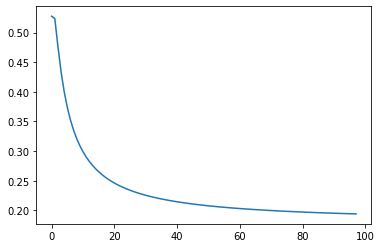

In [ ]:
import sympy as sm
from sympy import Symbol
from sympy.functions.combinatorial.numbers import stirling, factorial, binomial

from IPython.display import display

def binom_raw_moment(n=Symbol('n'),p=Symbol('p'),d=2):

  def summand(k):
    return stirling(d,k)*factorial(k)*binomial(n,k)*p**k

  out = sum(summand(k) for k in range(d+1))

  return out

def binom_central_moment(n=Symbol('n'),p=Symbol('p'),d=2):

  def summand(k):
    return binomial(d,k)*binom_raw_moment(n,p,k)*(-n*p)**(d-k)

  out = sum(summand(k) for k in range(d+1))

  return out

def binom_central_moment_norm(n=Symbol('n'),p=Symbol('p'),d=2):
  ''' normalized by n**(d/2) '''

  out = binom_central_moment(n,p,d)/n**(d/2)
  x = Symbol('x')
  out = out.subs(n,1/x).simplify().subs(x,1/n)
  return out

def binom_symmetr_moment(n=Symbol('n'),p=Symbol('p'),d=2):
  ''' moment of B'-B'', the symmetrized binomial '''

  def summand(k):
    return (-1)**(d-k)*binomial(d,k)*binom_raw_moment(n,p,k)*binom_raw_moment(n,p,d-k)

  out = sum(summand(k) for k in range(d+1))

  return out

def binom_symmetr_norm_moment(n=Symbol('n'),p=Symbol('p'),d=2):
  ''' moment of B'-B'' (symmetrized), normalized by n^(d/2) '''

  out = binom_symmetr_moment(n,p,d)/n**(d/2)
  x = Symbol('x')
  out = out.subs(n,1/x).simplify().subs(x,1/n)
  return out

  return out

from matplotlib import pyplot as plt
outs = [binom_symmetr_norm_moment(n,0.1,10) for n in range(2,100)]
plt.plot(outs)

## test: compare with known equations on central moments

n,p = Symbol('n'),Symbol('p')
display(binom_central_moment_norm(n,p,4))

## convert symbolic functions to fast numpy functions

n = Symbol('n')
p = Symbol('p')
d = 30
binom_symmetr_norm_moment_np = {}
for i in range(0,d+1,2):
  binom_symmetr_norm_moment_np[i] = sm.utilities.lambdify([n,p],binom_symmetr_norm_moment(n,p,i))

## Combinatorial Moment Bounds

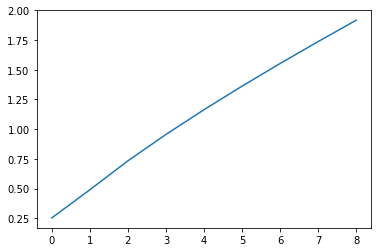

In [ ]:
import itertools
import numpy as np
from scipy import special, optimize

def T_new(n,p,d,v):
  ''' moment bound for single error contrib (ours); note the factor of 4 which appears except the case of d=2'''
  out = sum(special.binom(d,2*k)*p**(k>0)*v**(2*k)*(1-v**2)**(d/2-k)*binom_symmetr_norm_moment_np[d-2*k](n-1,p) for k in range(int(d/2)+1))
  if d>2:
    return 4*out ** (2/d)
  else:
    return 2**0.5*out ** (2/d)

def T_old(n,p,d,v):
  ''' moment bound for single error contrib (prior works)
      based on Lemma 2.1 (Lemma D.1, Lemma D.2) in https://arxiv.org/pdf/1903.03605.pdf
      note an extra factor of 2 is due to symmetrization
   '''
  bound_d1 = max(v* d/k * (p/(d*v**2)) ** (1/(2*k)) for k in range(1,int(d/2)+1) )**2
  bound_d2 = d/np.log(1/p)
  # add hidden constants
  bound_d1 = 2*2*np.exp(1)*bound_d1
  bound_d2 = 2*8*bound_d2
  return min(bound_d1,bound_d2)

def T_total_new(n,m,p,d,v,T=T_new):
  ''' moment bound for total error, needs subroutine for error contribs '''
  ks = np.arange(2,d+1,2)
  outs = np.array([T(n,p,k,v)* special.binom(d,k)**(1/k) for k in ks])
  fun = lambda t: np.log( 1+ ((outs/t)**ks).sum() ) - d/(2*m)
  a = 1e-6
  b = m*d
  Q = optimize.bisect(fun,a,b)
  s = m*p
  return Q/s

def get_confidence(n,m,p,eps,v,T=T_new):

  outs = []
  for k in range(2,30+1,2):
    moment = T_total_new(n,m,p,k,v,T)
    out = (moment/eps)**k
    outs.append(out)
  return min(outs)

def plot_confidence(n,m,p,v,T=T_new,label=None,ax=None,linestyle=None):

  eps_grid = np.linspace(0,1,50)
  outs = []

  for eps in eps_grid:
    out = get_confidence(n,m,p,eps,v,T)
    out = min(out,1)
    outs.append(out)

  ## smooth the plot
  outs = gaussian_filter1d(outs,1)
  ax.plot(eps_grid,1-outs,label=label,linestyle=linestyle)


## sanity check: expect linear growth in d

from matplotlib import pyplot as plt
plt.plot([T_total_new(1000,100,0.1,d,0.1,T=T_new) for d in range(2,20,2)])

# Experiments

## Running Time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


(0.0, 0.01)

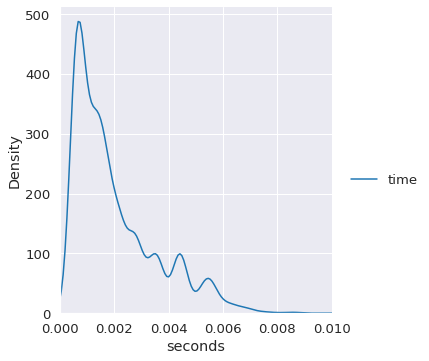

In [ ]:
import seaborn as sn
import numpy as np
import pandas as pd
import time

sn.set_style('darkgrid')
sn.set_context("notebook",font_scale=1.2)

times = {}
enne = []
emme = []
di = []
pi = []
vi = []
timing = []
estimation = []
for _ in range(10000):
  ## sample setups

  n = np.random.randint(1000,100000)
  m = int(np.random.randint(int(0.01*n),n))
  d = np.random.randint(2,30+1)
  p = np.random.uniform(1e-3,1)
  v = np.random.uniform(1e-3,1) # different v - different data

  enne.append(n)
  emme.append(m)
  di.append(d)
  pi.append(p)
  vi.append(v)
  ## measure time
  start_time = time.time()
  estimation.append(T_total_new(n,m,p,d,v))
  end_time = time.time()
  timing.append((end_time-start_time))

times['time'] = timing

pd = pd.DataFrame.from_dict(times)
sn.displot(times, kind="kde")
plt.xlabel('seconds')
plt.xlim((0,0.01))

In [ ]:
## see Colab PCU params
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

## Dispersion

In [ ]:
datasets.keys()

dict_keys(['CIFAR10', 'CIFAR100', 'SVHN', 'NIPS', 'News20', 'Goodwin', 'Mycielski', 'MNIST', 'Caltech101'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


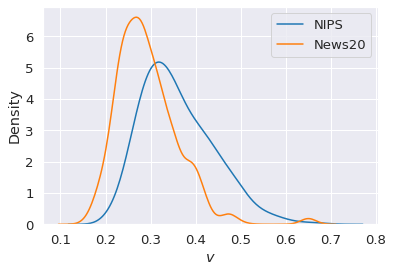

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2

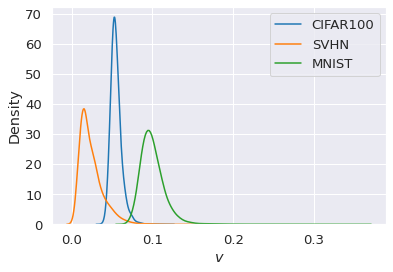

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


KeyError: ignored

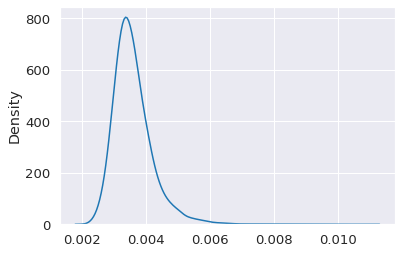

In [ ]:
#for k in ['NIPS','Word2Vec','News20']:
for k in ['NIPS','News20']:
  Xs = datasets[k]
  plot_dispersion(Xs,label=k)
plt.xlabel('$v$')
plt.legend()
plt.show()

for k in ['CIFAR100','SVHN','MNIST']:
  Xs = datasets[k]
  plot_dispersion(Xs,label=k)
plt.xlabel('$v$')
plt.legend()
plt.show()

for k in ['Caltech101','Cars']:
  Xs = datasets[k]
  plot_dispersion(Xs,label=k)
plt.xlabel('$v$')
plt.legend()
plt.show()

In [ ]:
for k in ['Mycielski','Goodwin']:
  Xs = datasets[k]
  plot_dispersion(Xs,label=k)
plt.xlabel('$v$')
plt.legend()
plt.show()

## Error Conbitubtions: Synthetic

In [ ]:
## install latex support in colab
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

from matplotlib import rc
import matplotlib.pyplot as plt
rc('text', usetex=True)

In [ ]:
## comparison synthetic

p_grid = np.linspace(0.001,0.1,7)
v_grid = np.linspace(0.01,0.2,7)

p = 0.001
n = 10000
d_range = range(2,30+1,2)

for v in v_grid:
  outs = []
  for d in d_range:
    out = []
    for T in [T_new,T_old]:
      out.append( T(n=n,p=p,d=int(d),v=v) )
    outs.append(out[0]/out[1])

  plt.plot(d_range,outs,label='v=%0.3f'%v)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel('$T_{new}/T_{old}$',fontsize=20)
plt.xlabel('$d$',fontsize=20)
plt.show()

v = 0.01

for p in p_grid:
  outs = []
  for d in d_range:
    out = []
    for T in [T_new,T_old]:
      out.append( T(n=n,p=p,d=int(d),v=v) )
    outs.append(out[0]/out[1])

  plt.plot(d_range,outs,label='p=%0.3f'%p)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel('$T_{new}/T_{old}$',fontsize=20)
plt.xlabel('$d$',fontsize=20)
plt.show()


## Confidence

In [ ]:
### final confidence comparison

import seaborn as sn
from scipy.ndimage import gaussian_filter1d

sn.set_style('darkgrid')
sn.set_context("notebook",font_scale=1.2)

## setup

p = 0.01

NUM_COLORS = 6
cm = plt.get_cmap('gist_rainbow')
fig,ax = plt.subplots()
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

## setup: take from real-world datasets

ds = {
'NIPS': {'n':13000,'v':0.3},
'News20': {'n':34000,'v':0.27},
'SVHN': {'n':1024,'v':0.005},
'Cars': {'n':25000,'v':0.003},
'Caltech': {'n':25000,'v':0.0025},
'Mycielski': {'n':98303,'v':0.001}
}

for label,param in ds.items():
  n = param['n']
  m = int(0.1 * n)
  p = 0.01
  v = param['v']
  plot_confidence(n,m,p,v,T_new,label=label+' (our)',ax=ax,linestyle='solid')

for label,param in ds.items():
  n = param['n']
  m = int(0.1 * n)
  p = 0.01
  v = param['v']
  plot_confidence(n,m,p,v,T_old,label=label+' (previous)',ax=ax,linestyle='dotted')

plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$1-\delta$',fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

## Sparsity

In [ ]:
### comparison of sparsity

from scipy.ndimage import gaussian_filter1d
import seaborn as sn

def best_s(n,m,eps,v,T=T_new):

  func = lambda s: get_confidence(n,m,s/m,eps,v,T)-0.25
  if func(1) < 0:
    return 1
  elif func(m) > 0:
    return m
  else:
    result = optimize.bisect(func,1,m)
    return result

## setup - based on real-world data

ds = {'Caltech101':{'n':25000,'m':500,'v':0.0035},
      'Cars':{'n':15000,'m':500,'v':0.0045},
      'News20':{'n':3400,'m':500,'v':0.2},
      'Goodwin':{'n':1800,'v':0.6},
      'SVHN':{'n':1024,'m':500,'v':0.01}
      }
eps_grid = np.linspace(0.0001,1,100)

NUM_COLORS = 5
cm = plt.get_cmap('gist_rainbow')
fig,ax = plt.subplots()
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for (method,T,style) in zip( [' (our)',' (previous)'], [T_new,T_old], ['solid','dotted'] ):
  for (lab,param) in ds.items():

    n = param['n']
    v = param['v']
    m = 0.2*n

    outs = []
    for eps in eps_grid:
      out =  best_s(n,m,eps,v,T)
      outs.append(out)
    outs = gaussian_filter1d(outs,0.1)
    sn.lineplot(eps_grid,outs,label=lab+method,ax=ax,linestyle=style)


plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$s$',fontsize=15)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#get_confidence(10000,500,0.3,0.1,0.01)

## Dimension

In [ ]:
### comparison of dimension

from scipy import optimize

def best_dim(n,p,eps,v,T=T_new):

  func = lambda m: get_confidence(n,m,p,eps,v,T)-0.5
  try:
    result = optimize.bisect(func,2,100000)
  except:
    result = -1
  finally:
    return result

## setup - based on real-world data


ds = {'Caltech101':{'n':25000,'m':500,'v':0.0025},
      'Cars':{'n':15000,'m':500,'v':0.003},
      'News20':{'n':3400,'m':500,'v':0.25},
      'SVHN':{'n':1024,'m':500,'v':0.005}
      }

eps_grid = np.linspace(0.1,1,10)
p = 0.1

## colors
NUM_COLORS = 4
cm = plt.get_cmap('gist_rainbow')
fig,ax = plt.subplots()
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

## evaluation

for (method,T,style) in zip( [' (our)',' (previous)'], [T_new,T_old], ['solid','dotted'] ):
  for (lab,param) in ds.items():

    n = param['n']
    v = param['v']

    outs = []
    for eps in eps_grid:
      outs.append(best_dim(n,p,eps,v,T))
    outs = gaussian_filter1d(outs,2)

    sn.lineplot(eps_grid,outs,label=lab+method,ax=ax,linestyle=style)

plt.xlabel('$\epsilon$',fontsize=15)
plt.ylabel('$m$',fontsize=15)
plt.yscale('log')